In [1]:
import tensorflow as tf 
from tensorflow.keras.optimizers import Adam


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle
import os

import seaborn as sns

In [2]:
from tensorflow.keras.applications import ResNet50V2, DenseNet201, InceptionV3, Xception, MobileNetV2, VGG19
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import  Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pickle

In [3]:
x_train = np.load('Created_NPY/train/Btrain_images.npy')
y_train = np.load('Created_NPY/train/Btrain_labels.npy')

x_val = np.load('Created_NPY/val/val_images.npy')
y_val = np.load('Created_NPY/val/val_labels.npy')

x_test = np.load('Created_NPY/test/Btest_images.npy')
y_test = np.load('Created_NPY/test/Btest_labels.npy')

classes = ["COVID", "NORMAL", "PNEUMONIA"]

image_size = 224

path = 'NewModel/'

In [4]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [6]:
def train_model(path, train_images=None, train_labels = None, 
                test_images = None, test_labels = None, 
                model_name = None, epochs =30, learning_rate = 0.0001,
                input_shape = (224,224,3), classes=3, batch_size = 16, 
                classifier_activation='softmax',
                callbacks = None):
    
    base_model = None
    
    if model_name == 'densenet201':        
        base_model = (weights = None, include_top = False, input_shape = input_shape)
        
    if model_name == 'xception':
        base_model = Xception(weights = None, include_top = False, input_shape = input_shape)
        
    
    x = base_model.output         
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    output = tf.keras.layers.Dense(classes, activation=classifier_activation)(x)
    
    model = Model(inputs = base_model.input, outputs = output)
    
    model.compile(optimizer = 'adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics = ['accuracy'])
        
    results = model.fit(train_images, train_labels, batch_size = 8, epochs = epochs,
                        steps_per_epoch = 100,
                        validation_data = (test_images, test_labels),  
                        callbacks = callbacks
                        )
    
    losses = pd.DataFrame(model.history.history)
    losses[['loss','val_loss']].plot()
    
    losses[['accuracy', 'val_accuracy']].plot()
    
    save_model = path + model_name + '.h5'
    model.save(save_model)
    
    return results

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, 
                           mode='min', restore_best_weights = True)

callbacks = [early_stop]


In [47]:
xception = train_model(path, x_train, y_train,
                       x_val, y_val, model_name="xception",
                       epochs=30, input_shape = (image_size,image_size,3),
                       classes = len(classes),
                       callbacks = callbacks)

Epoch 1/30
100/100 [==============================] - 347s 3s/step - loss: 0.6432 - accuracy: 0.7700 - val_loss: 1.0976 - val_accuracy: 0.4461
Epoch 2/30
100/100 [==============================] - 338s 3s/step - loss: 0.4643 - accuracy: 0.8400 - val_loss: 1.1349 - val_accuracy: 0.1095
Epoch 3/30
100/100 [==============================] - 337s 3s/step - loss: 0.3089 - accuracy: 0.8861 - val_loss: 1.2891 - val_accuracy: 0.1095
Epoch 4/30
100/100 [==============================] - 334s 3s/step - loss: 0.4343 - accuracy: 0.8587 - val_loss: 1.2924 - val_accuracy: 0.1095
Epoch 5/30
100/100 [==============================] - 336s 3s/step - loss: 0.3121 - accuracy: 0.8925 - val_loss: 1.4794 - val_accuracy: 0.5257
Epoch 6/30
100/100 [==============================] - 335s 3s/step - loss: 0.2502 - accuracy: 0.9074 - val_loss: 0.8216 - val_accuracy: 0.6186
Epoch 7/30
100/100 [==============================] - 337s 3s/step - loss: 0.2847 - accuracy: 0.8888 - val_loss: 0.5044 - val_accuracy: 0.7861

Epoch 1/30
100/100 [==============================] - 616s 6s/step - loss: 0.7464 - accuracy: 0.7150 - val_loss: 5.4746 - val_accuracy: 0.1095
Epoch 2/30
100/100 [==============================] - 628s 6s/step - loss: 0.5563 - accuracy: 0.7975 - val_loss: 2.0091 - val_accuracy: 0.3947
Epoch 3/30
100/100 [==============================] - 599s 6s/step - loss: 0.5011 - accuracy: 0.8073 - val_loss: 1.2159 - val_accuracy: 0.4876
Epoch 4/30
100/100 [==============================] - 583s 6s/step - loss: 0.4277 - accuracy: 0.8487 - val_loss: 1.1688 - val_accuracy: 0.6766
Epoch 5/30
100/100 [==============================] - 583s 6s/step - loss: 0.4128 - accuracy: 0.8500 - val_loss: 9.2051 - val_accuracy: 0.2405
Epoch 6/30
100/100 [==============================] - 604s 6s/step - loss: 0.3273 - accuracy: 0.8974 - val_loss: 13.2444 - val_accuracy: 0.4544
Epoch 7/30
100/100 [==============================] - 584s 6s/step - loss: 0.3526 - accuracy: 0.8712 - val_loss: 1.0805 - val_accuracy: 0.751

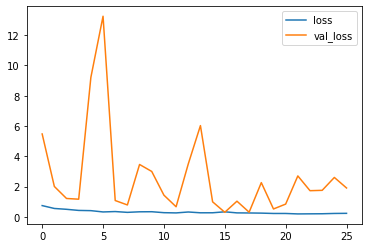

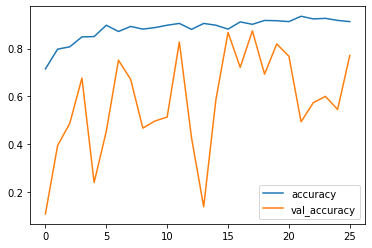

In [9]:
densenet = train_model(path, x_train, y_train,
                     x_val, y_val, model_name="densenet201",
                     epochs=30,  input_shape = (image_size,image_size,3),
                     classes = len(classes),
                     callbacks = callbacks)

In [52]:
def ensemble(x, weights, models): 
    '''
    returns a weighted average of predictions made by the models\n
    x -> input image \n
    weights -> a list of weights \n
    models -> a list of models\n    
    '''      
    outputs = []    
    for model in models:                
        outputs.append(list(model.predict(x)[0]))                
    
    outputs = np.array(outputs)
    avg = np.average(a=outputs,axis=0,weights=weights)
    return avg


def equal(pred, label):
  pred_id = np.argmax(pred)
  if (pred_id == label):
    return True
  else:
    return False


def accuracy(predicted_values, y_truths):
  '''
  returns accuracy\n
  predicted_values = a numpy array containing the predictions\n
  y_truths = a numpy array containing the truth values\n  
  '''
  total = len(y_truths)
  correct = 0
  for i in range(len(y_truths)):
    if equal(predicted_values[i],y_truths[i]):
      correct += 1
  acc = correct / total
  return acc


def generate_weights(x_val, y_val, models):
    '''
    returns a list of weights
    '''
    accuracy = []
    weights = np.full((1,len(models)), 100.0)
    for model in models:
      acc = model.evaluate(x_val, y_val)[1]
      accuracy.append(100*acc)
    weights = weights - accuracy
    weights = weights**2
    sum = np.sum(weights)
    weights = weights/sum
    weights = 1/weights
    weights = weights**2
    sum = np.sum(weights)
    weights = weights/sum
    return weights


 

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

inception_path = 'NewModel/'
resnet_path = 'NewModel/'
densenet_path = 'NewModel/'
xception_path = 'NewModel/xception.h5'


xception_model = tf.keras.models.load_model(xception_path)
#resnet_model = tf.keras.models.load_model(resnet_path)
#densenet_model = tf.keras.models.load_model(densenet_path)

models = [xception_model]

w = generate_weights(x_test,y_test,models)[0] #generating weights
print("Weights: ", w)

predictions = []
for i in range(len(x_test)):
  pred = ensemble(x_test[i].reshape(-1,image_size,image_size,3),w,models)
  predictions.append(pred)

print("Accuracy: ",accuracy(predictions,y_test))

y_pred = np.argmax(np.array(predictions), axis=1)

print("The classification report: ")
print(classification_report(y_pred=y_pred, y_true=y_test))
print()
print("Confusion Matrix: ")
print(confusion_matrix(y_pred=y_pred, y_true=y_test))

10/10 [==============================] - 23s 2s/step - loss: 0.1940 - accuracy: 0.9375
Weights:  [1.]
Accuracy:  0.9375
The classification report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.96      0.90      0.93       135
           2       0.92      0.96      0.94       135

    accuracy                           0.94       304
   macro avg       0.94      0.95      0.94       304
weighted avg       0.94      0.94      0.94       304


Confusion Matrix: 
[[ 33   0   1]
 [  2 122  11]
 [  0   5 130]]
